<a href="https://colab.research.google.com/github/jembi/mpi-toolkit-notebook/blob/MPIT-107/blocking-notebook/MPIBlockingNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

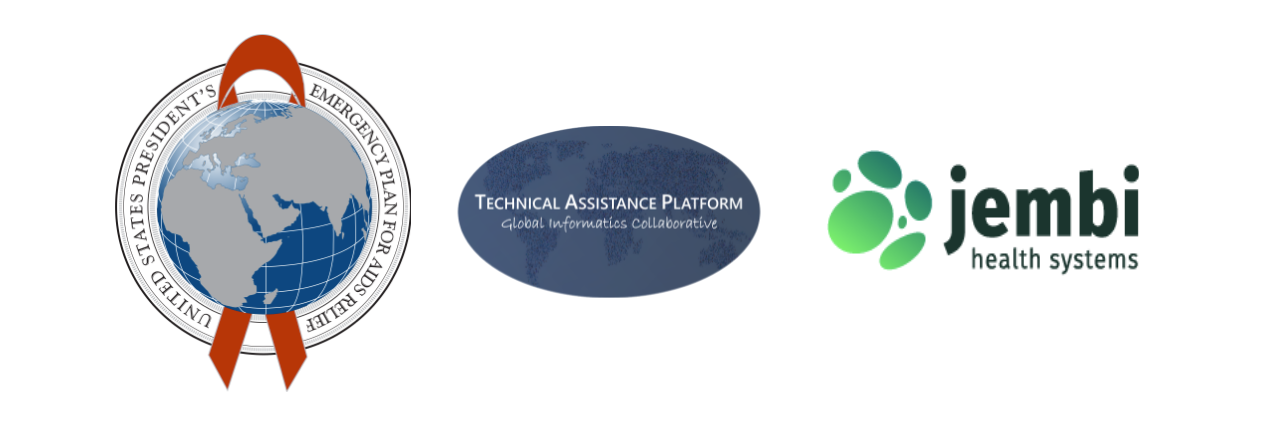

#**<font color="#007f68"> MPI Blocking Notebook**



Blocking is the process of grouping records that are probable matches and excluding unlikely matches. This is necessary to reduce the total number of possible matches due to processing power limitations. Any identifier that adds meaningful information to identify an individual can be used, however more fields of data compared is more computationally intensive. Matching algorithms are used to do the comparisons. It is a constant process of checking and adjusting the blocking criteria and algorithms used to minimise false negative rates whilst trying to maximise efficiency. It is important to block carefully, only using identifiers that are likely to be quite stable across all sources.

Researchers have developed several algorithms for scoring the distance between two strings based on their phonetic pronunciation, the number of character changes it would take to convert one to the other, or the number of characters (or perhaps initial characters) that they have in common.

**Phonetic algorithms**
*   Soundex is a phonetic algorithm whereby values are assigned to letters in such a manner that similar-sounding letters get the same value.
*   Metaphone adds more contextual rules than SoundEx that account for the varying changes in phonetics depending on how letters relate to each other. Based on English spelling, it classifies letters according to the context that they are in.
*   Double Metaphone was developed in 2000 to be an improvement on Metaphone and includes an extra output option if the string can be interpretted in two different ways. 

**String distance/similarity algorithms**
*   Jaccard similarity looks at the similarity of the characters without factoring in their positions relating to each other. It counts the number of letters in common (intersection) between the two strings divided by all the letters of the strings (union) to express the similarity (sidenote: the names Siri and Iris would show 100% Jaccard similarity)
*   Jaro-Winkler similarity is a string metric measuring the similarity between two strings based on matching letters, transposed letters and scaled based on the matching prefix letters that takes into consideration the letter order.
*   Levenshtein edit distance is a string metric that measures the minimum number of edits (insertion, deletion, substitution) required to change one string to another.
* Damerau-Levenshtein edit distance is an improvement on Levenshtein by allowing for inversion edits to be included as well.
*   Exact match is an exact comparison between two strings. The match is either true (1) or false (0).

An interactive tutorial of the mentioned algorithms can be found in section 8 of this notebook.

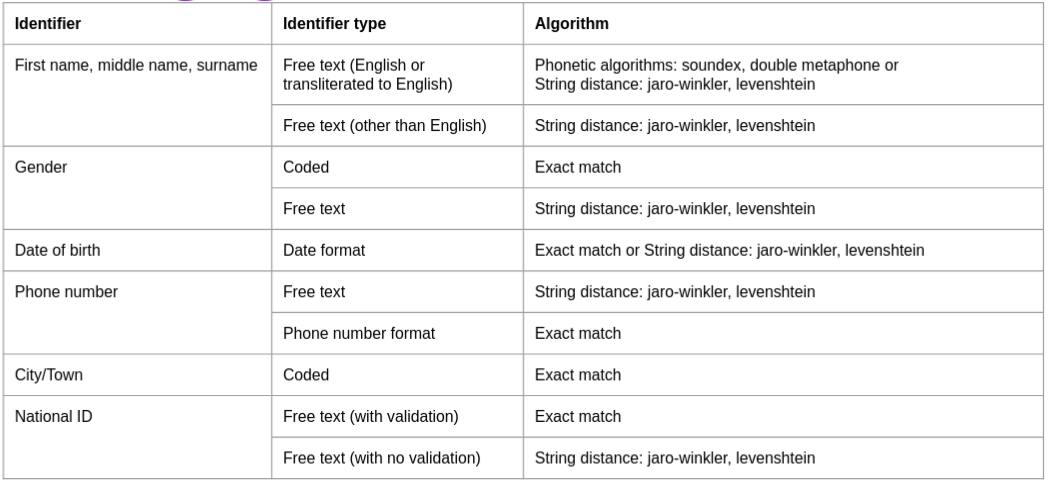

##**<font color="#007f68"> How to use Notebook**

**Section 1:**
Import necessary libraries and modules 

**Section 2:**
Load csv file in one of three methods:
1.   Mount from Google Drive folder
2.   Upload from local computer
3.   Load sample dataset

**Section 3:**
Choose which columns/demographic data to block on and select which algorithms and levels to apply to each column.

**Section 4:**
Execute blocking functions

**Section 5:**
Display results in paragraph, table and pie chart format as well as display false negatives

**Section 6:**
Save results to a Google spreadsheet in your drive

**Section 7 (optional):** 
Demonstrate string and phonetic matching algorithms 

## <font color="#007f68">Links:

[Directory](https://colab.research.google.com/github/jembi/mpi-toolkit-notebook/blob/main/MPI_Directory.ipynb)

[Data Generator](https://colab.research.google.com/github/jembi/mpi-toolkit-notebook/blob/main/data-generator/GECO-Kenya/Generate_Data.ipynb)

[Fastlink](https://colab.research.google.com/github/jembi/mpi-toolkit-notebook/blob/main/fastLink-notebook/Fastlink_R.ipynb)

## **<font color="#007f68">1) Import necessary libraries and GitHub modules**




In [ ]:
#@title <font color="#18CF68">Setup Notebook

!pip install -q requests
from google.colab import files, drive, auth
import sys
import os
import csv
import pandas as pd

from ipywidgets import HBox, VBox, Checkbox, Dropdown, Button, FloatSlider, Text
from IPython.display import display

from time import time, ctime
from tqdm.notebook import tqdm

from IPython.display import HTML, display
from tabulate import tabulate

import matplotlib.pyplot as plt

from oauth2client.client import GoogleCredentials

!pip install -q --upgrade gspread
import gspread

%load_ext google.colab.data_table

import requests
from IPython.utils import io

def add_import(pck, url):
  with io.capture_output() as captured:
    r = requests.get(url)
    with open(pck + ".py", 'w') as f:
      f.write(r.text)
    i = __import__ (pck)
    try:
      os.remove(pck + ".py")
    except OSError:
      pass
    return i

menu_list = ["Setup Notebook", 
             "Choose Github branch",
             "Import blocking libraries and algorithms", 
             "Pick method of uploading csv file", 
             "Select desired datafile",
             "Widgets to interact and choosing blocking methods",
             "Summarise data", 
             "Blocking functions", 
             "Execute blocking on data_frame using criteria_list"]

def tracker_err_msg(tracker, cell_id):

    print("Please execute code cell(s) from \n'" + menu_list[tracker + 1] + "' \nup to the \n'" + menu_list[cell_id] + "'\n cell before continuing!")

tracker = 0

In [ ]:
#@title <font color="#18CF68">Choose Github branch

cell_id = 1
if tracker >= (cell_id - 1):

    git_b = !git ls-remote --heads https://github.com/jembi/mpi-toolkit-notebook.git
    branches = git_b.get_list()

    heads = []
    for i in range(len(branches)):
      for j in range(len(branches[i]))[::-1]:
        if branches[i][j] == "/":
          heads.append(branches[i][j + 1:])
          break

    style = {'description_width': 'initial'}
    branch_menu = Dropdown(description= "Choose branch to work with:", options=heads, style=style, value=heads[len(branches)-2])
    display(branch_menu)

    tracker = cell_id
else:
    tracker_err_msg(tracker, cell_id)

In [ ]:
#@title <font color="#18CF68">Import blocking libraries and algorithms

cell_id = 2
if tracker >= (cell_id - 1):
  !pip install -q phonetics
  !pip install -q fastDamerauLevenshtein
  !pip install -q textdistance

  brnch = branch_menu.value

  compare_soundex = add_import("compare_soundex", 'https://raw.githubusercontent.com/jembi/mpi-toolkit-notebook/{0}/blocking-notebook/compare_soundex.py'.format(brnch))
  compare_metaphone = add_import("compare_metaphone", 'https://raw.githubusercontent.com/jembi/mpi-toolkit-notebook/{0}/blocking-notebook/compare_metaphone.py'.format(brnch))
  compare_double_metaphone = add_import("compare_double_metaphone", 'https://raw.githubusercontent.com/jembi/mpi-toolkit-notebook/{0}/blocking-notebook/compare_double_metaphone.py'.format(brnch))
  compare_levenshtein = add_import("compare_levenshtein", 'https://raw.githubusercontent.com/jembi/mpi-toolkit-notebook/{0}/blocking-notebook/compare_levenshtein.py'.format(brnch))
  compare_damerau_levenshtein = add_import("compare_damerau_levenshtein", 'https://raw.githubusercontent.com/jembi/mpi-toolkit-notebook/{0}/blocking-notebook/compare_damerau_levenshtein.py'.format(brnch))
  compare_jaro_winkler = add_import("compare_jaro_winkler", 'https://raw.githubusercontent.com/jembi/mpi-toolkit-notebook/{0}/blocking-notebook/compare_jaro_winkler.py'.format(brnch))
  compare_jaccard_similarity = add_import("compare_jaccard_similarity", 'https://raw.githubusercontent.com/jembi/mpi-toolkit-notebook/{0}/blocking-notebook/compare_jaccard_similarity.py'.format(brnch))
  compare_exact_match = add_import("compare_exact_match", 'https://raw.githubusercontent.com/jembi/mpi-toolkit-notebook/{0}/blocking-notebook/compare_exact_match.py'.format(brnch))

  tracker = cell_id
else:
  tracker_err_msg(tracker, cell_id)

## **<font color="#007f68">2) Import/Upload csv file and load to DataFrame**

In [ ]:
#@title <font color="#18CF68">Pick method of uploading csv file

cell_id = 3
if tracker >= (cell_id - 1):
    file_option = menu_1 = Dropdown(options=['Upload from google drive', 'Upload local file', "Use sample dataset"])
    display(file_option)

    tracker = cell_id
else:
    tracker_err_msg(tracker, cell_id)

📝 <font color="red">NOTE: Adjust your file_name and file_directory variables before running the next cell

In [ ]:
#@title <font color="#18CF68">Select desired datafile

#Load function
def load_data(file_directory):

    data_frame = []

    #@markdown Only the value_separator if your csv file does not use commas 

    value_separator = "," #@param [",", ";", " "]

    with open(file_directory) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=value_separator)
        for row in csv_reader:
            data_frame.append(row)

    return data_frame


#Clean data
def clean_data(list_of_data):

    list_of_data = [d for d in list_of_data if d]

    for i in range(len(list_of_data)):
        for j in range(len(list_of_data[i])):
            if type(list_of_data[i][j]) is not str:
                list_of_data[i][j] = ""
    
    return list_of_data


cell_id = 4
if tracker >= (cell_id - 1):

    #@markdown Ensure these variables match your file and directory

    file_name = "data-801-400.csv" #@param {type:"string"}
    folder_directory = "/content/drive/MyDrive/Data Generator/" #@param {type:"string"}

    if file_option.value == "Upload from google drive":
        drive.mount('/content/drive')
        style = {'description_width': 'initial'}
        layout = {'width': '400px'}
        
        data_frame = load_data(folder_directory + file_name)

    elif file_option.value == "Upload local file":
        
        files.upload()

        try:
            folder_directory = "/content/"
            data_frame = load_data(folder_directory + file_name)
        except:
            for file in os.listdir("/content"):
                if file.endswith(".csv"):
                    file_name = str(file)
                    break
            data_frame = load_data("/content/" + file_name)

    else:
        df = pd.read_csv("https://raw.githubusercontent.com/jembi/mpi-toolkit-notebook/{0}/fastLink-notebook/data-200-100.csv".format(brnch), header=None)
        
        data_frame = df.values.tolist()
        file_name = "data-200-100.csv"

        print("Using sample dataset: {}".format(file_name))

    data_frame = clean_data(data_frame)


    # Display data file in table
    display(pd.DataFrame(data_frame[1:], columns=data_frame[0]))

    tracker = cell_id
else:
    tracker_err_msg(tracker, cell_id)

## **<font color="#007f68">3) Choose blocking strategies**

1. Choose which column you want to block on.
2. That enables you to choose which algorithm you want to compare the fields with
3. Depending on the algorithm (similairty, edit distance, phonetic match), this can allow for the level to be selected, this enables the 'Intersection' button.
4. Clicking on 'Intersection' adds it to the list. Any items added by 'Intersection' follow an 'and' rule where all must be true to return true.
5. After selecting 'Intersection', 'Union' is enabled to add an 'or' option between criteria.
6. If an error occurs, click reset to empty the criteria_list.
7. A maximum of 6 criteria within the union list can be added, there is no limit to the number of intersections that are required. This limit can be extended but it is not recommended.
8. Do not forget to press 'Intersection' to add your selection to criteria_list.

In [ ]:
#@title <font color="#18CF68">Widgets to interact and choosing blocking methods

def change_algorithm(*args):
    algorithm_field.disabled=False
    union_button.disabled=True
    intersection_button.disabled=True


def change_slide(*args):
    if algorithm_field.value in ["Levenshtein Edit Distance", "Damerau-Levenshtein Edit Distance"]:
        level_slider.disabled=False
        level_slider.value=2
        level_slider.max=5
        level_slider.step=1
    elif algorithm_field.value in ["Jaro-Winkler Similarity", "Jaccard Similarity"]:
        level_slider.value=0.85
        level_slider.max = 1
        level_slider.step=0.05
        level_slider.disabled=False
    intersection_button.disabled=False


def print_union():
    for item in criteria_list:
        if item:
            print(item)


def print_intersection():
    print("Column:    {}\nAlgorithm: {}\nLevel:     {}".format(columns_field.value, algorithm_field.value, level_slider.value))


def intersection_click(*args):
    print_intersection()                          # prints what you just selected
    criteria_list[criteria_list_index].append([columns_field.value, algorithm_field.value, level_slider.value])

    # reset the columns, algorithm and level field
    columns_field.value="None"
    algorithm_field.value="None"
    algorithm_field.disabled=True
    level_slider.disabled=True
    level_slider.value=0

    union_button.disabled=False         # activate the union button so dict can be added to the criteria_union_list
    intersection_button.disabled=True   # deactivate the intersection button 


def union_click(*args):
    global criteria_list_index
    if criteria_list_index < list_limit:
        criteria_list_index += 1
    else:
        print("Criteria list full, update criteria list limit")

    # reset the columns, algorithm. Deactivate the algorithm and level dropdowns, and union button again
    intersection_button.disabled=True   # deactivate the intersection button 
    columns_field.value="None"
    algorithm_field.value="None"
    algorithm_field.disabled=True
    level_slider.disabled=True
    union_button.disabled=True
    level_slider.value=0

    print_union()


def reset_click(*args):
    # reset everything
    global criteria_list
    global criteria_list_index
    criteria_list = [[] for _ in range(list_limit)]
    criteria_list_index = 0

    columns_field.value="None"
    algorithm_field.value="None"
    algorithm_field.disabled=True
    level_slider.disabled=True
    union_button.disabled=True
    level_slider.value=0
    print("Criteria reset")


cell_id = 5
if tracker >= (cell_id - 1):

    #@markdown Only adjust list_limit if you wish to add more than 6 blocking criteria in union

    list_limit = 6 #@param {type:"integer"}
    criteria_list = [[] for _ in range(list_limit)]
    criteria_list_index = 0 

    columns = ["None"] + data_frame[0][1:]
    columns_field = Dropdown(description="Columns: ", options=[c for c in columns])
    algorithm_field = Dropdown(description="Algorithms: ", options=["None", "Exact Match", "Jaro-Winkler Similarity", "Levenshtein Edit Distance", "Damerau-Levenshtein Edit Distance", "Jaccard Similarity", "SoundEx", "Metaphone", "Double Metaphone"], disabled=True)
    level_slider = FloatSlider(description="Level: ", value=0, min=0, max=5, step=1, disabled=True)

    columns_field.observe(change_algorithm, 'value')

    algorithm_field.observe(change_slide, 'value')

    intersection_button = Button(description="Add/Intersection", disabled=True)   # "Add"
    union_button = Button(description="Update/Union", disabled=True)              # "Update"
    reset_button = Button(description="Reset")

    intersection_button.on_click(intersection_click)
    union_button.on_click(union_click)
    reset_button.on_click(reset_click)

    dropdown_list = HBox([columns_field, algorithm_field, level_slider])
    button_list = HBox([intersection_button, union_button, reset_button])
    display(VBox([dropdown_list, button_list]))

    tracker = cell_id
else:
    tracker_err_msg(tracker, cell_id)

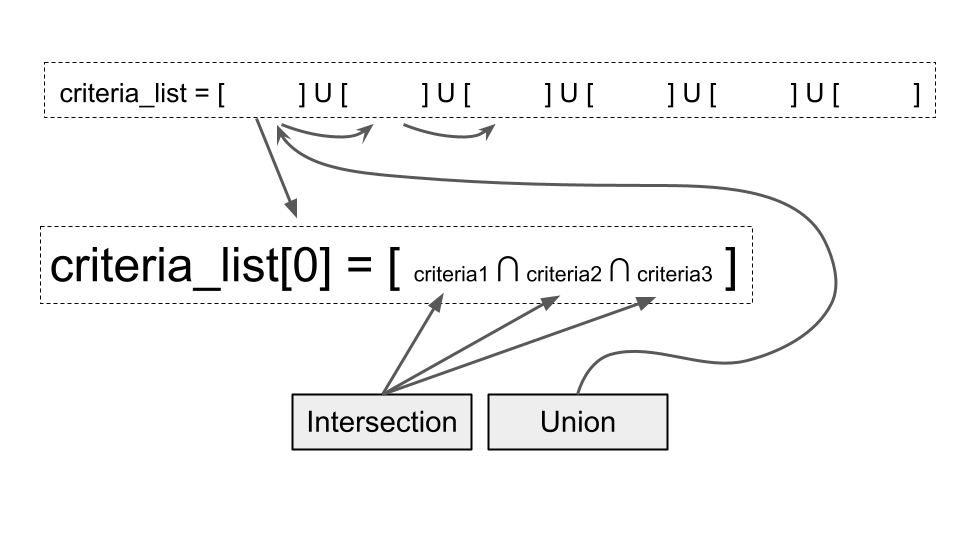


In [ ]:
#@title <font color="#18CF68">Summarise data
cell_id = 6
if tracker >= (cell_id - 1):
    for ind, c in enumerate(criteria_list):
        if c:
            print(c)
        else:
            shorten = ind
            break

    new_criteria_list = criteria_list[:shorten]

    tracker = cell_id
else:
    tracker_err_msg(tracker, cell_id)

💡 <font color="#34aeeb">Suggestion: Press 'Ctrl + F10' to run all the remaining blocks of code

## **<font color="#007f68">4) Implement blocking strategies from the criteria_list on the data_frame**

In [ ]:
#@title <font color="#18CF68">Blocking functions

cell_id = 7
if tracker >= (cell_id - 1):

    def blocking(rec1, rec2, new_criteria_list):

        for criteria in new_criteria_list:
            if criteria:
                intersection_count = 0
                for option in criteria:
                    result = implement(rec1[column_identity(option[0])], rec2[column_identity(option[0])], option[1], option[2])
                    if result:
                        intersection_count += 1
                if intersection_count == len(criteria):
                    return True
        return False


    def implement(field1, field2, algorithm, level):

        if algorithm == "Exact Match":
            return compare_exact_match.compare(field1, field2)
        elif algorithm == "Jaro-Winkler Similarity":
            return compare_jaro_winkler.compare(field1, field2, level)
        elif algorithm == "Levenshtein Edit Distance":
            return compare_levenshtein.compare(field1, field2, level)
        elif algorithm == "Damerau-Levenshtein Edit Distance":
            return compare_damerau_levenshtein.compare(field1, field2, level)
        elif algorithm == "Jaccard Similarity":
            return compare_jaccard_similarity.compare(field1, field2, level)
        elif algorithm == "SoundEx":
            return compare_soundex.compare(field1, field2)
        elif algorithm == "Metaphone":
            return compare_metaphone.compare(field1, field2)
        elif algorithm == "Double Metaphone":
            return compare_double_metaphone.compare(field1, field2)
        else:
            return None


    def missing_data(rec1, rec2, new_criteria_list):

        for criteria in new_criteria_list:
            if criteria:
                for option in criteria:
                    if not rec1[column_identity(option[0])] or not rec2[column_identity(option[0])]:
                        return True
        return False


    def column_identity(name):
        for ind, col_name in enumerate(columns):
            if col_name == name:
                return ind 
        return None


    tracker = cell_id
else:
    tracker_err_msg(tracker, cell_id)

In [ ]:
#@title <font color="#18CF68">Execute blocking on data_frame using criteria_list

cell_id = 8
if tracker >= (cell_id - 1):

    start_time = time()

    true_pos, false_neg, false_pos, true_neg = 0, 0, 0, 0
    total_matches = 0
    total_missing, missing_pos= 0, 0

    false_neg_indices = []

    for i in tqdm(range(1, len(data_frame))):
        for j in range(i+1, len(data_frame)):
            total_matches += 1
            match_bool = blocking(data_frame[i], data_frame[j], new_criteria_list)
            if match_bool:
                if data_frame[i][0][:12] == data_frame[j][0][:12]:
                    true_pos += 1
                else:
                    false_pos += 1
            elif missing_data(data_frame[i], data_frame[j], new_criteria_list):
                total_missing += 1
                if data_frame[i][0][:12] == data_frame[j][0][:12]:
                    missing_pos += 1
                else:
                    false_pos += 1
            else:
                if data_frame[i][0][:12] == data_frame[j][0][:12]:
                    false_neg += 1
                    false_neg_indices.append([i, j])
                else:
                    true_neg += 1

    end_time = time()

    results_list = [["Total matches", total_matches],
                ["Matches excluded", false_neg + true_neg],
                ["Missing data inclusions", total_missing],
                ["Missing data positives", missing_pos],
                ["Algorithm positives", true_pos],
                ["Total true positives", true_pos + missing_pos],   
                ["False negatives", false_neg],
                ["False positives", false_pos],
                ["Recall", (true_pos + missing_pos) / (true_pos + missing_pos + false_neg)],
                ["Precision", (true_pos + missing_pos) / (true_pos + missing_pos + false_pos)],
                ["Blocking efficiency", (true_neg + false_neg) / total_matches],
                ["Runtime", end_time - start_time]]

    tracker = cell_id
else:
    tracker_err_msg(tracker, cell_id)

Iterates through all combinations of records once, skipping repeated and unnecessary comparisons.

tqdm provides a progress bar for the user to see how long it will take

Each record pair is compared in the blocking function

Keeps track of:
*   true positives
*   false positives
*   true negative
*   false negatives
*   missing data inclusions
*   missing data positives
*   total matches
*   runtime



## **<font color="#007f68">5) Summarise results**

In [ ]:
#@title <font color="#18CF68">Display results in paragraph format

print("Blocking on the data from file {} with {} records using the following columns and algorithms:".format(file_name, len(data_frame)-1))
for criteria in new_criteria_list:
    print("-> {}".format(criteria))

print("\nThis method identified {} True Positive matches with a further {} positive matches in the missing data inclusion.\n".format(true_pos, missing_pos))

print("{} False Negative matches and {} False Positive matches produce a recall rate of {} and precision of {}\n".format(false_neg, false_pos, (true_pos + missing_pos) / (true_pos + missing_pos + false_neg), (true_pos + missing_pos) / (true_pos + missing_pos + false_pos)))

print("{} matches were excluded out of the {} total matches, providing a blocking efficiency of {}\n".format(false_neg + true_neg, total_matches, (false_neg + true_neg) / total_matches))

print("Runtime = {}".format(end_time - start_time))

In [ ]:
#@title <font color="#18CF68">Display results in table

display(HTML(tabulate(results_list, tablefmt='html')))


In [ ]:
#@title <font color="#18CF68">Display results in pie charts using matplotlib

recall = (true_pos + missing_pos) / (true_pos + missing_pos + false_neg)
recall_labels = ["Recall", " "]
recall_sections = [recall, 1 - recall]


precision = true_pos / (true_pos + false_pos + missing_pos)
prec_labels = ["Precision", " "]
prec_sections = [precision, 1 - precision]

blocking_efficiency = (true_neg + false_neg) / total_matches 
be_labels = ["Blocking efficiency", " "]
be_sections = [blocking_efficiency, 1 - blocking_efficiency]

positives = [true_pos]
pos_labels = ["True positives"]
if missing_pos:
    positives.append(missing_pos)
    pos_labels.append("Missing data positives")
if false_neg:
    positives.append(false_neg)
    pos_labels.append("False positives")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 10))
colors = ["#6396e6", "#de73e6"]


axes[0].pie(recall_sections, 
        labels=recall_labels, 
        colors=colors, 
        startangle=90,
        autopct='%1.4f%%')
axes[1].pie(prec_sections, 
        labels=prec_labels, 
        colors=colors,
        startangle=90, 
        autopct='%1.4f%%')
axes[2].pie(be_sections, 
        labels=be_labels, 
        colors=colors, 
        startangle=90, 
        autopct='%1.4f%%')
axes[3].pie(positives, 
            labels=pos_labels, 
            colors=["#6396e6","#63e581", "#de73e6"], 
            startangle=90,
            autopct='%1.4f%%')

plt.title("Pie charts showing Recall, Precision and Blocking Efficiency")

In [ ]:
#@title <font color="#18CF68">Print False Negatives

false_neg_table = []

#column_row = [n[0][0] for n in new_criteria_list]*2

#false_neg_table.append(column_row)

if false_neg_indices:
    criteria_column_indices = set()

    for criteria in new_criteria_list:
        for option in criteria:
            criteria_column_indices.add(column_identity(option[0]))

    column_row = [data_frame[0][i] for i in criteria_column_indices]*2

    for row_ind in false_neg_indices:
        false_neg_row = []
        for col_ind in criteria_column_indices:
            false_neg_row.append(data_frame[row_ind[0]][col_ind])
        for col_ind in criteria_column_indices:
            false_neg_row.append(data_frame[row_ind[1]][col_ind])
        false_neg_table.append(false_neg_row)

    print(tabulate(false_neg_table, column_row, tablefmt='github'))

else:
    print("No false negatives to show")



## **<font color="#007f68">6) Add results to Google sheets**

In [ ]:
#@title <font color="#18CF68">Process output results

def file_search():

    # Create file if missing

    for file in os.listdir("/content/drive/MyDrive"):
        if 'BlockingResults' in file:
            return True
    return False


def string_format(c_list):
    
    # Format list items into a string

    output_string = ""

    for c in c_list:
        if c[2] == 0:
            output_string += "{}: {}, ".format(c[0], c[1])
        else:
            output_string += "{}: {} - {}, ".format(c[0], c[1], c[2])

    return output_string[:-2]


def build_output():

    # Create the output list from the results

    output_list = [ctime(), file_name]

    for c_ind in range(6):
        if c_ind >= len(new_criteria_list):
            output_list.append("None")
        else:
            output_list.append(string_format(new_criteria_list[c_ind]))
    for r in results_list:
        output_list.append(str(r[1]))
    return output_list

    

In [ ]:
#@title <font color="#18CF68">Update data to Google Spreadsheet - 'BlockingResults'

drive.mount('/content/drive')
auth.authenticate_user()

gc = gspread.authorize(GoogleCredentials.get_application_default())

output_list = build_output()

if file_search():
    sh = gc.open('BlockingResults')
    ws = sh.get_worksheet(0)

    rows = ws.get_all_values()
    df = pd.DataFrame.from_records(rows[1:], columns=rows[0])

    df.loc[len(df)] = output_list

    ws.update('A1', [df.columns.to_list()] + df.to_numpy().tolist())

else:
    sh = gc.create('BlockingResults')
    ws = sh.sheet1

    df = pd.DataFrame([output_list], columns=['Date and Time', 'Data file', 
                     'Criteria 1', 'Criteria 2', 'Criteria 3', 'Criteria 4', 
                     'Criteria 5', 'Criteria 6', 'Total Matches', 
                     'Matches Excluded', 'Missing Data Inclusions', 
                     'Missing Data Positivies', 'Algorithm Positives', 
                     'Total True Positives', 'False Negatives', 
                     'False Positives', 'Recall (%)', 'Precision (%)', 
                     'Blocking Efficiency (%)', 'Runtime (seconds)'])

    ws.update('A1', [df.columns.to_list()] + df.to_numpy().tolist())



## **<font color="#007f68">7) Visualising string matching algorithms**

### <font color="#007f68">Phonetic algorithms

In [ ]:
#@title <font color="#18CF68">Phonetic algorithm outputs

name_input = Text(description="Enter name")
phonetic_algorithm = Dropdown(description="Phonetic algorithm", options=["SoundEx", "Metaphone", "Double Metaphone"])
run_button = Button(description="Run")

def run_phonetic_func(*args):

    if phonetic_algorithm.value == "SoundEx":
        print(name_input.value, compare_soundex.output(name_input.value))
    elif phonetic_algorithm.value == "Metaphone":
        print(name_input.value, compare_metaphone.output(name_input.value))
    elif phonetic_algorithm.value == "Double Metaphone":
        print(name_input.value, compare_double_metaphone.output(name_input.value))
    else:
        print("Error")

run_button.on_click(run_phonetic_func)

VBox([name_input, phonetic_algorithm, run_button])

### <font color="#007f68">Edit distance algorithms

In [ ]:
#@title <font color="#18CF68">Edit algorithm outputs

name1_input = Text(description="Enter first name")
name2_input = Text(description="Enter second name")

ed_algorithm = Dropdown(description="Edit distance algorithm", options=["Jaccard Similarity", "Jaro-Winkler", "Levenshtein", "Damerau-Levenshtein"])
run_button = Button(description="Run")

def run_ed_func(*args):

    if ed_algorithm.value == "Jaccard Similarity":
        print(name1_input.value, name2_input.value, compare_jaccard_similarity.output(name1_input.value, name2_input.value))
    elif ed_algorithm.value == "Jaro-Winkler":
        print(name1_input.value, name2_input.value, compare_jaro_winkler.output(name1_input.value, name2_input.value))
    elif ed_algorithm.value == "Levenshtein":
        print(name1_input.value, name2_input.value, compare_levenshtein.output(name1_input.value, name2_input.value))
    elif ed_algorithm.value == "Damerau-Levenshtein":
        print(name1_input.value, name2_input.value, compare_damerau_levenshtein.output(name1_input.value, name2_input.value))
    else:
        print("Error")

run_button.on_click(run_ed_func)

VBox([name1_input, name2_input, ed_algorithm, run_button])